In [11]:
import sklearn
import pandas as pd
import joblib
import dill
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix 
from os.path import expanduser as ospath
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import KFold


In [12]:
# read all data
data_train = pd.read_csv("../Data/Data Set/Data Train/Data Train Pandas Correlation.csv")
data_test = pd.read_csv("../Data/Data Set/Data Test/Data Test.csv")
selective_deskriptor = joblib.load("../Data/selective_deskriptor (Iterasi 100x).pkl")
scaler = joblib.load("../Data/scaler.pkl")

In [13]:
selective_deskriptor

[['nBondsS2', 'ATS4i', 'GATS5s', 'TIC4', 'AATS1i'],
 ['AMR', 'ATS6i', 'TIC5', 'GATS6s', 'GATS4s', 'ATS7v'],
 ['Sse', 'ATS2v', 'ATS5p', 'GATS7s', 'McGowan_Volume', 'ZMIC1', 'WTPT-1'],
 ['GATS3s',
  'ATS2v',
  'ATS0v',
  'GATS8s',
  'SpDiam_Dt',
  'SIC2',
  'Kier1',
  'WTPT-1'],
 ['CIC0', 'nBondsS3', 'AMR', 'IC0', 'GATS5s', 'SIC2', 'ATS2i', 'AMW', 'MW'],
 ['AMR',
  'SIC0',
  'nC',
  'Sv',
  'BIC1',
  'GATS4s',
  'ATS0v',
  'GATS8s',
  'ATS8p',
  'CrippenLogP']]

In [14]:
data_train

,Label,AMR,nBondsS2,CIC0,nH,nBondsS3,GATS3s,SIC0,ATSC0v,ATS3e,...,AATS4e,SpAD_Dt,Kier1,nHeavyAtom,AMW,AATS1i,Mpe,Mare,MW,WTPT-1
0,0,152.0223,101.0,5.390269,58,43.0,0.000000,0.185109,4898.147300,2380.555660,...,7.396171,1212.463772,31.425620,40,5.739014,144.736506,0.940136,0.953469,562.423340,80.511498
1,1,63.3585,41.0,3.903831,21,20.0,0.932455,0.324756,2446.324593,1068.136260,...,8.166362,751.787623,28.569444,34,8.693571,151.208526,1.023886,1.042036,478.146404,68.015603
2,1,39.8206,27.0,3.036062,15,12.0,0.879281,0.368455,1493.394534,535.803010,...,7.913964,114.813967,11.076923,13,6.647056,150.406827,0.970448,0.987857,186.117573,24.986486
3,1,51.5910,38.0,3.611194,22,16.0,0.805772,0.316761,2007.274461,770.433398,...,7.701788,184.330070,15.058824,17,6.235267,151.700706,0.959075,0.975590,243.175422,32.973525
4,1,62.3639,39.0,4.048208,23,16.0,0.732657,0.279000,2396.871717,962.264824,...,7.768986,465.373095,20.727041,26,7.207861,149.405870,0.969428,0.983265,353.185175,52.681024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5176,0,111.5027,83.0,5.067454,53,30.0,0.000000,0.219413,4928.107842,1698.475968,...,7.277163,908.378997,35.027027,37,7.258562,145.727595,0.939608,0.950844,653.270608,72.749585
5177,0,132.9472,81.0,5.067039,50,31.0,0.000000,0.223271,4885.600963,1773.760902,...,7.285866,956.403067,34.865185,42,6.634226,148.120159,0.941986,0.953478,610.348752,84.761904
5178,0,137.8655,90.0,5.444964,56,34.0,0.000000,0.173121,5044.863992,2104.717868,...,7.228250,966.003256,32.904273,40,5.712739,143.083612,0.930842,0.942500,548.422946,80.277150
5179,1,54.6634,44.0,4.348705,27,17.0,0.697435,0.247806,2824.474576,1114.877172,...,7.405682,517.464021,22.680000,28,6.967587,146.496135,0.963494,0.976800,383.217304,56.587408


In [15]:
# define x train and y train
# x_train --> 5-10 jenis fitur yg diambil, y_train --> label
X_train = data_train.iloc[:,1:] # kolom fitur
# Y_train = data_train.iloc[:,:1] # kolom label
X_train_scale = scaler.transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)
X_train_scale

x_train = []
for i in range(len(selective_deskriptor)):
    # Get position (name column) every row selective_deskriptor
    value = X_train_scale.loc[:, selective_deskriptor[i]]
    x_train.append(value)

y_train = data_train.iloc[:,:1] # kolom label

In [16]:
# # define x test and y test
# # x_test --> 5-10 jenis fitur yg diambil, y_test --> label
# x_test = []
# for i in range(len(selective_deskriptor)):
#     # Get position (name column) every row selective_deskriptor
#     value = data_test.loc[:, selective_deskriptor[i]]

#     # Feature Scaler Using StandarScaler()
#     # scaler.fit(value)
#     x_test_scale = scaler.transform(value)

#     # Convert the NumPy Array scale_x_test to DataFrame
#     x_test_scale = pd.DataFrame(x_test_scale, columns=value.columns) 

#     x_test.append(x_test_scale)

# y_test = data_test.iloc[:,-1]

In [17]:
# Optimal number of features? - Part 1

optimal_features_list_acc_train = []
optimal_features_list_acc_test = []
optimal_features_list_acc_train_loss = []
optimal_features_list_acc_test_loss = []
for kernel in ('linear', 'poly', 'rbf'):
    print('KERNEL : ', kernel, '\n')
    position_local = 0
    list_acc_train = []
    list_acc_test = []
    list_acc_train_loss = []
    list_acc_test_loss = []
    acc = 0
    for i in tqdm(range(len(selective_deskriptor))):
        # X_train2, X_test_val, Y_train2, Y_test_val = train_test_split(x_train[i], y_train, test_size = 0.25, random_state = 42, shuffle=True)
        # clf = svm.SVC(kernel='linear', C=1, random_state=42)
        

        # train the model on train set
        model = svm.SVC(kernel = kernel, probability=True, random_state=46) 
        # kfold = KFold(n_splits=5, random_state=46)
        # kfold.get_n_splits(x_train[i], y_train)
        scores = cross_validate(model, x_train[i], y_train, cv=5, scoring=('accuracy','neg_log_loss'), return_train_score=True)
        
        # save accuracy each kernel
        nilai_train = scores['train_accuracy']
        nilai_test = scores['test_accuracy']
        nilai_train_loss = scores['train_neg_log_loss']
        nilai_test_loss = scores['test_neg_log_loss']

        nilai_avg_train = sum(nilai_train) / len(nilai_train)
        nilai_avg_test = sum(nilai_test) / len(nilai_test)
        nilai_avg_train_loss = abs(sum(nilai_train_loss) / len(nilai_train_loss))
        nilai_avg_test_loss = abs(sum(nilai_test_loss) / len(nilai_test_loss))
        print(nilai_avg_test_loss)

        list_acc_train.append(nilai_avg_train)
        list_acc_test.append(nilai_avg_test)
        list_acc_train_loss.append(nilai_avg_train_loss)
        list_acc_test_loss.append(nilai_avg_test_loss)

        # end for i in range(len(selective_deskriptor))

    # save in to list each value
    optimal_features_list_acc_train.append(list_acc_train)
    optimal_features_list_acc_test.append(list_acc_test)
    optimal_features_list_acc_train_loss.append(list_acc_train_loss)
    optimal_features_list_acc_test_loss.append(list_acc_test_loss)


    # end for kernel in ('linear', 'poly', 'rbf'):


        # scores = cross_val_score(model, x_train[i], y_train, cv=5, scoring=log_loss)
        # score_mean = scores.mean()

        # model.fit(X_train2, Y_train2) 
        

#         # print prediction train2 results 
#         predictions = model.predict(X_train2) 
#         score_train2 = accuracy_score(Y_train2, predictions)
#         print('score_train2 : ', score_train2)
#         conmat = confusion_matrix(Y_train2, predictions)
#         # print('classfication report train 2 : \n', classification_report(Y_train2, predictions))
#         # print('score / accuracy train 2 : ', score_train2)
#         # print('conmat train 2 : \n', conmat)


#         # print prediction test_val results 
#         predictions = model.predict(X_test_val)        
#         score_test_val = accuracy_score(Y_test_val, predictions)        
#         print('score_test_val : ', score_test_val)
#         conmat = confusion_matrix(Y_test_val, predictions)
#         # print('classfication report test val : \n', classification_report(Y_test_val, predictions))
#         # print('score / accuracy test val : ', score_test_val)
#         # print('conmat test val : \n', conmat)

#         list_acc_test.append(score_test_val)
#         list_acc_train.append(score_train2)

#         if (i == 0):
#             position_local = i
#             acc = score_test_val
#             # print('acc local : ', acc)
#             # print('the_best local : ', the_best)
#         elif (score_test_val > acc):
#             position_local = i
#             acc = score_test_val
#             # print('acc local : ', acc)
#             # print('the_best local : \n', the_best)

#         # end if search the best

#     optimal_features_list_acc_test.append(list_acc_test)
#     optimal_features_list_acc_train.append(list_acc_train)
#     position_optimal_features.append(position_local)
#     # print('position the_best of ', kernel, ':', position_local)
#     # print('point / accuracy the best of ', kernel, ':', acc)

#     # end looping i

# # end looping kernel


  0%|          | 0/6 [00:00<?, ?it/s]KERNEL :  linear 

  0%|          | 0/6 [00:00<?, ?it/s]0.11965659803647741
KERNEL :  poly 

  0%|          | 0/6 [00:00<?, ?it/s]0.22003033427618285
KERNEL :  rbf 

100%|██████████| 6/6 [00:07<00:00,  1.19s/it]0.059071015193196255



In [18]:
scores

{'fit_time': array([0.16116118, 0.17394447, 0.1651504 , 0.16615057, 0.16114664]),
 'score_time': array([0.0140152 , 0.01501369, 0.01401258, 0.01401258, 0.01501393]),
 'test_accuracy': array([0.9807136 , 0.98745174, 0.97876448, 0.97876448, 0.98938224]),
 'train_accuracy': array([0.98383205, 0.98190591, 0.98431846, 0.98431846, 0.98190591]),
 'test_neg_log_loss': array([-0.06238945, -0.0473076 , -0.06871895, -0.06809303, -0.04884605]),
 'train_neg_log_loss': array([-0.05359897, -0.05199601, -0.05255188, -0.04485306, -0.04730235])}

In [19]:
# Optimal number of features? - Part 2

# print posisi terbaik dari 6 jenis fitur untuk setiap jenis kernel
# save nilai-nilai akurasi untuk tiap kernel dari 6 jenis fitur
# nilai akurasi dari tiap jenis kernel (terbaik)
best_optimal_feature_test = []
best_optimal_feature_train = []
position_optimal_features = []
for i in range(len(optimal_features_list_acc_test_loss)):
    p = np.argmin(optimal_features_list_acc_test_loss[i])
    position_optimal_features.append(p)
    value_test = optimal_features_list_acc_test[i][p]
    best_optimal_feature_test.append(value_test)
    value_train = optimal_features_list_acc_train[i][p]
    best_optimal_feature_train.append(value_train)

# Save position optimal features
joblib.dump(position_optimal_features, '../Data/position_optimal_features.pkl')

print('Best position for each kernel (linear, poly, rbf) : ', position_optimal_features)
print('--------------- \n')

print('Data Train score accracy : ')
print('all point / accuracy Optimal Features each features (5-10) for linear, poly, rbf : \n', optimal_features_list_acc_train)
print('best point / accuracy Optimal Features (linear, poly, rbf) : ', best_optimal_feature_train, '\n')
print('--------------- \n')

print('Data Test score accracy : ')
print('all point / accuracy Optimal Features each features (5-10) for linear, poly, rbf : \n', optimal_features_list_acc_test)
print('best point / accuracy Optimal Features (linear, poly, rbf) :', best_optimal_feature_test)
print('--------------- \n')

print('Data Train loss accuracy : ')
print('all loss point / accuracy Optimal Features each features (5-10) for linear, poly, rbf : \n', optimal_features_list_acc_train_loss)
print('best loss point / accuracy Optimal Features (linear, poly, rbf) : ', best_optimal_feature_train, '\n')
print('--------------- \n')

print('Data Test loss accuracy : ')
print('all loss point / accuracy Optimal Features each features (5-10) for linear, poly, rbf : \n', optimal_features_list_acc_test_loss)
print('best loss point / accuracy Optimal Features (linear, poly, rbf) :', best_optimal_feature_test)

Best position for each kernel (linear, poly, rbf) :  [4, 4, 5]
--------------- 

Data Train score accracy : 
all point / accuracy Optimal Features each features (5-10) for linear, poly, rbf : 
 [[0.9816638178761217, 0.9821946011149871, 0.9814225517090416, 0.9801197074206724, 0.9808917451830601, 0.9824841065432139], [0.9825323574479183, 0.9830631523303419, 0.9778035242721612, 0.9769349381261323, 0.9841246955209562, 0.982387604733805], [0.9841246722338399, 0.9833044068538641, 0.9826771334491479, 0.9811330229936985, 0.983400920306831, 0.9832561559491596]]
best point / accuracy Optimal Features (linear, poly, rbf) :  [0.9808917451830601, 0.9841246955209562, 0.9832561559491596] 

--------------- 

Data Test score accracy : 
all point / accuracy Optimal Features each features (5-10) for linear, poly, rbf : 
 [[0.9814716493597881, 0.9818575635836966, 0.9812782268423541, 0.980313162039295, 0.981085176649304, 0.9826292058693216], [0.9820502414523629, 0.9828222560623718, 0.9768388170509675, 0.97

In [20]:
# # np.argmin(optimal_features_list_acc_test_loss[0])
# position_optimal_features = []
# print('linear : ',np.argmin(optimal_features_list_acc_test_loss[0])+5)
# position_optimal_features.append(np.argmin(optimal_features_list_acc_test_loss[0]))
# print('Poly   : ',np.argmin(optimal_features_list_acc_test_loss[1])+5)
# position_optimal_features.append(np.argmin(optimal_features_list_acc_test_loss[1]))
# print('RBF    : ',np.argmin(optimal_features_list_acc_test_loss[2])+5)
# position_optimal_features.append(np.argmin(optimal_features_list_acc_test_loss[2]))
# joblib.dump(position_optimal_features, '../Data/position_optimal_features.pkl')
# position_optimal_features

In [21]:
# # Optimal number of features? - Part 3

# # plotting akurasi optimal features 
# # perlu diperbaiki --> x label nya harusnya dari angka 5 (5 - 10 jenis fitur), bukan 0
# name_kernel = 'linear', 'poly', 'rbf'
# values = [5,6,7,8,9,10]
# for i in range(len(optimal_features_list_acc_test)):
#     x = range(len(optimal_features_list_acc_test[i]))
#     plt.plot(optimal_features_list_acc_train[i], '--', label='%s kernel - Train' % name_kernel[i], marker='o')
#     plt.plot(optimal_features_list_acc_test[i], label='%s kernel - Test' % name_kernel[i], marker='o')
#     plt.xlabel('5-10 Fitur')
#     plt.ylabel('Acuracy')
#     plt.suptitle('Accuracy without hyper parameter (Optimal features)')
#     plt.xticks(x, values)
#     plt.legend()

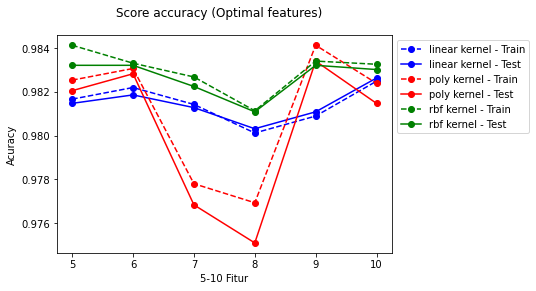

In [22]:
# Optimal number of features? - Part 3

# plotting akurasi optimal features 
name_kernel = 'linear', 'poly', 'rbf'
values = [5,6,7,8,9,10]
x = range(len(optimal_features_list_acc_test[i]))

plt.plot(optimal_features_list_acc_train[0], 'b--', label='%s kernel - Train' % name_kernel[0], marker='o')
plt.plot(optimal_features_list_acc_test[0], 'b', label='%s kernel - Test' % name_kernel[0], marker='o')
plt.plot(optimal_features_list_acc_train[1], 'r--', label='%s kernel - Train' % name_kernel[1], marker='o')
plt.plot(optimal_features_list_acc_test[1], 'r', label='%s kernel - Test' % name_kernel[1], marker='o')
plt.plot(optimal_features_list_acc_train[2], 'g--', label='%s kernel - Train' % name_kernel[2], marker='o')
plt.plot(optimal_features_list_acc_test[2], 'g', label='%s kernel - Test' % name_kernel[2], marker='o')

plt.xlabel('5-10 Fitur')
plt.ylabel('Acuracy')
plt.suptitle('Score accuracy (Optimal features)')
plt.xticks(x, values)
plt.legend(bbox_to_anchor=(1,1), loc='best')

# save picture
plt.savefig('score_ccuracy.png', format='png', dpi=1000, bbox_inches="tight")
plt.show()

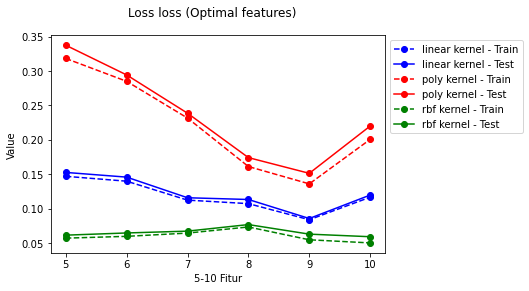

In [23]:
# Optimal number of features? - Part 4

# plotting loss akurasi optimal features 
plt.plot(optimal_features_list_acc_train_loss[0], 'b--', label='%s kernel - Train' % name_kernel[0], marker='o')
plt.plot(optimal_features_list_acc_test_loss[0], 'b', label='%s kernel - Test' % name_kernel[0], marker='o')
plt.plot(optimal_features_list_acc_train_loss[1], 'r--', label='%s kernel - Train' % name_kernel[1], marker='o')
plt.plot(optimal_features_list_acc_test_loss[1], 'r', label='%s kernel - Test' % name_kernel[1], marker='o')
plt.plot(optimal_features_list_acc_train_loss[2], 'g--', label='%s kernel - Train' % name_kernel[2], marker='o')
plt.plot(optimal_features_list_acc_test_loss[2], 'g', label='%s kernel - Test' % name_kernel[2], marker='o')

plt.xlabel('5-10 Fitur')
plt.ylabel('Value')
plt.suptitle('Loss loss (Optimal features)')
plt.xticks(x, values)
plt.legend(bbox_to_anchor=(1,1), loc='best')
# save picture
plt.savefig('log_loss.png', format='png', dpi=1000, bbox_inches="tight")

plt.show()

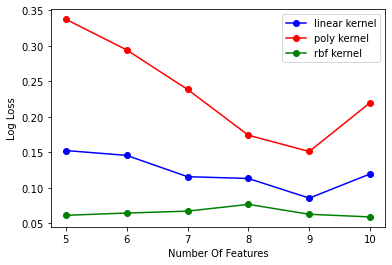

In [24]:
# Optimal number of features? - Part 4

# plotting loss akurasi optimal features 
# plt.plot(optimal_features_list_acc_train_loss[0], 'b--', label='%s kernel - Train' % name_kernel[0], marker='o')
plt.plot(optimal_features_list_acc_test_loss[0], 'b', label='%s kernel' % name_kernel[0], marker='o')
# plt.plot(optimal_features_list_acc_train_loss[1], 'r--', label='%s kernel - Train' % name_kernel[1], marker='o')
plt.plot(optimal_features_list_acc_test_loss[1], 'r', label='%s kernel' % name_kernel[1], marker='o')
# plt.plot(optimal_features_list_acc_train_loss[2], 'g--', label='%s kernel - Train' % name_kernel[2], marker='o')
plt.plot(optimal_features_list_acc_test_loss[2], 'g', label='%s kernel' % name_kernel[2], marker='o')

plt.xlabel('Number Of Features')
plt.ylabel('Log Loss')
# plt.suptitle('Log loss (Optimal features)')
plt.xticks(x, values)
plt.legend(bbox_to_anchor=(1,1), loc='best')
# save picture
plt.savefig('log_loss_test.png', format='png', dpi=1000, bbox_inches="tight")

plt.show()

In [25]:
for i in range(len(name_kernel)):
    print(name_kernel[i], ':', optimal_features_list_acc_test_loss[i])

linear : [0.1525907884068514, 0.14574965320892658, 0.1157512489824645, 0.11321850564440002, 0.08556456121337801, 0.11965659803647741]
poly : [0.33756244206309094, 0.29435287701834645, 0.23869923481020208, 0.17412597268249702, 0.15127117851128458, 0.22003033427618285]
rbf : [0.06134374582940695, 0.06453160252907411, 0.06721015242886995, 0.07673024217063037, 0.062819686005255, 0.059071015193196255]


In [26]:
# save session 
import dill
dill.dump_session('../Data/SVM - part 1.db')

In [27]:
# load session 
import dill
dill.load_session('../Data/SVM - part 1.db')